### Here let's go through an example where we have a spatially inhomogenous data 

Similar to spatially adaptive splines we can preset our difference matrix for better performance

In [1]:
import sys

sys.path.append("../")
sys.path.append("../../")

import numpy as np
from matplotlib import pyplot as plt

from estimators.trend_filtering.trend_filter import Trend_Filter
from estimators.cv_base_estimator import cv_base_estimator

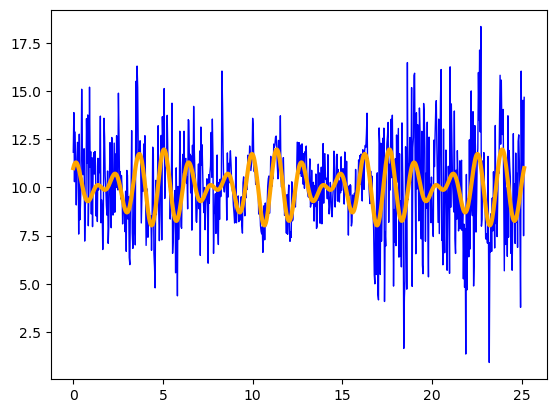

In [3]:
def generate_spatially_inhomogenous_data():

    # generate data
    n = 250

    x = np.zeros( 3 * n)

        # generate time
    t = np.linspace(0, 8*np.pi, 3 * n)
    t1=t[0:n]
    t2=t[n:2*n]
    t3=t[2*n:3*n]

    # generate spatially inhomogenous data
    # x[0:n] = np.sin(4*t1) + np.random.normal(0, 0.5, n)+1
    # x[n:2*n] = 3*np.sin(2*t2) + np.random.normal(0, 1.25, n)+2
    # x[2*n:3*n] = 0.5*np.sin(2*t3) + np.random.normal(0, 0.7, n)-0.25*t3+6

    x[0:n] = np.sin(4*t1) +np.cos(5*t1)+ np.random.normal(0, 2, n)+10
    x[n:2*n] = np.sin(4*t2) + np.cos(5*t2)+np.random.normal(0, 1, n)+10
    x[2*n:3*n] = np.sin(4*t3) + np.cos(5*t3)+np.random.normal(0, 3, n)+10



    true_fun=np.sin(4*t) +np.cos(5*t)+10


    return x, t, true_fun
    

x,t,true_fun=generate_spatially_inhomogenous_data()

plt.plot(t,x,color='blue',lw=1)
plt.plot(t,true_fun,color='orange',lw=3)




### Piecewise Linear Comparison

In [4]:
tf1=Trend_Filter(t,x,1,'primal_dual')

cv_base_estimator(tf1)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 0.25372197555184445
Performing cross validation for lambda = 0.48986044196571743
Performing cross validation for lambda = 0.9457724427729555
Performing cross validation for lambda = 1.8260007073021103
Performing cross validation for lambda = 3.525455418527392
Performing cross validation for lambda = 6.806588769829982
Performing cross validation for lambda = 13.141465479352991
Performing cross validation for lambda = 25.372197555184442
Performing cross validation for lambda = 48.98604419657174
Performing cross validation for lambda = 94.57724427729556
Performing cross validation for lambda = 182.60007073021083
Performing cross validation for lambda = 352.5455418527392
Performing cross validation for lambda = 680.6588769829982
Performing cross validation for lambda = 1314.1465479352978
Performing cross validation for lambda = 2537.2197555184443
Performing  1 out of 3 iterations of cross validat

{'lambda_': 86.80447173463111}

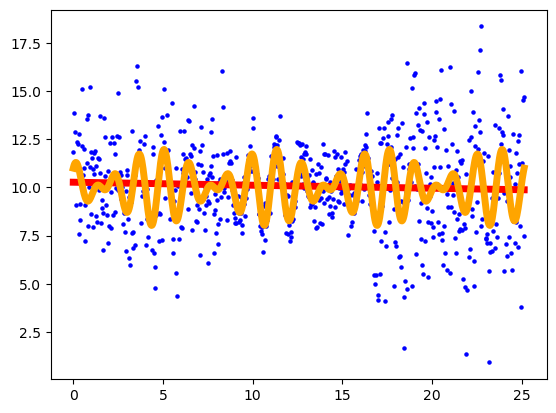

In [5]:
sol=tf1.y_hat

plt.plot(t,sol,label='solution',color='red',lw=5)
plt.scatter(t,x,label='data',color='blue',s=5)
plt.plot(t,true_fun,label='true function',color='orange',lw=5)


### Second Order Comparison

In [8]:
tf2=Trend_Filter(t[:250],x[:250],2,'primal_dual')

cv_base_estimator(tf2)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 1.481150811046521
Performing cross validation for lambda = 2.859654507021101
Performing cross validation for lambda = 5.521128462096389
Performing cross validation for lambda = 10.659630182642177
Performing cross validation for lambda = 20.58052378436259
Performing cross validation for lambda = 39.734770529696554
Performing cross validation for lambda = 76.7158312193823
Performing cross validation for lambda = 148.1150811046521
Performing cross validation for lambda = 285.9654507021101
Performing cross validation for lambda = 552.1128462096389
Performing cross validation for lambda = 1065.9630182642165
Performing cross validation for lambda = 2058.052378436259
Performing cross validation for lambda = 3973.4770529696557
Performing cross validation for lambda = 7671.583121938222
Performing cross validation for lambda = 14811.508110465209
Performing  1 out of 3 iterations of cross validation
Per

{'lambda_': 14.715703498658897}

In [9]:
new_tf2=Trend_Filter(t,x,2,'primal_dual')

new_tf2.update_params(tf2.hypers)

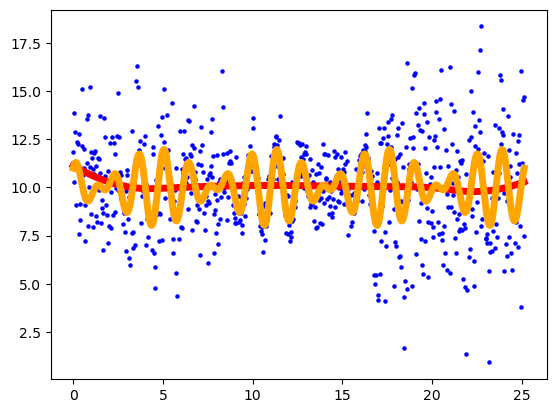

In [10]:
sol=new_tf2.y_hat
plt.plot(t,sol,label='solution',color='red',lw=5)
plt.scatter(t,x,label='data',color='blue',s=5)
plt.plot(t,true_fun,label='true function',color='orange',lw=5)
